In [1]:
import estimators.pipeline

from models.models import GerstnerWaves
from models.simulation import DataGeneration

from utils.plots import GerstnerWavesPlots
from utils.utils import get_add_filters_per_estimator

from estimators.pipeline import Pipeline

from config import configuration

In [54]:
# Set configuration
data_config_name = 'len250_r1'
ekf_config_name = 'ekf_default'
knet_config_name = 'knet_default'
training_config = 'default_wd1e-6'
result_config_name = 'default'

data_config = configuration.get_data_config_from_json(
    configuration.get_json_from_path(configuration.DATA_CONFIG_JSON_PATH), data_config_name)
ekf_config = configuration.get_estimator_config_from_json(
    configuration.get_json_from_path(configuration.ESTIMATOR_CONFIG_JSON_PATH), ekf_config_name, train_config_name=None, data_config=data_config)
knet_config = configuration.get_estimator_config_from_json(
    configuration.get_json_from_path(configuration.ESTIMATOR_CONFIG_JSON_PATH), knet_config_name, train_config_name=training_config, data_config=data_config)
result_config = configuration.get_result_config_from_json(
    configuration.get_json_from_path(configuration.RESULT_CONFIG_JSON_PATH), result_config_name)

# Load training, validation and test data
datagen = DataGeneration(data_config.save_info.path, data_config.save_info.name, GerstnerWaves())
[train, val, test] = datagen.load_data()

# Initialize plot object
plot = GerstnerWavesPlots('data/plots', result_config.save_info.path, format='eps')
plot.set_figsize((11, 6))
plot.set_fontsize(12)

In [55]:
# Generate data
pipeline_name = 'p_' + knet_config.save_info.name

pipeline_knet = estimators.pipeline.load_pipeline(knet_config.save_info.path, pipeline_name)
pipeline_knet.set_device("cuda")
pipeline_knet.set_loss_function(knet_config.train_config.loss)
pipeline_knet.test_estimator(test[2], test[1])

pipeline_ekf = Pipeline(ekf_config.save_info.path, ekf_config.save_info.name)
pipeline_ekf.load_estimator()
pipeline_ekf.set_loss_function(knet_config.train_config.loss)
pipeline_ekf.test_estimator(test[2], test[1])

In [56]:
# Loss
train_avg_loss, train_state_loss = pipeline_knet.get_loss_train_per_epoch(in_decibel=False)
val_avg_loss, val_state_loss = pipeline_knet.get_loss_val_per_epoch(in_decibel=False)
test_state_loss_knet, test_state_loss_batch_knet = pipeline_knet.get_state_loss_test(in_decibel=False)
test_state_loss_ekf, test_state_loss_batch_ekf = pipeline_ekf.get_state_loss_test(in_decibel=False)
test_loss_knet = pipeline_knet.get_mean_loss_test(in_decibel=False)
test_loss_ekf = pipeline_ekf.get_mean_loss_test(in_decibel=False)

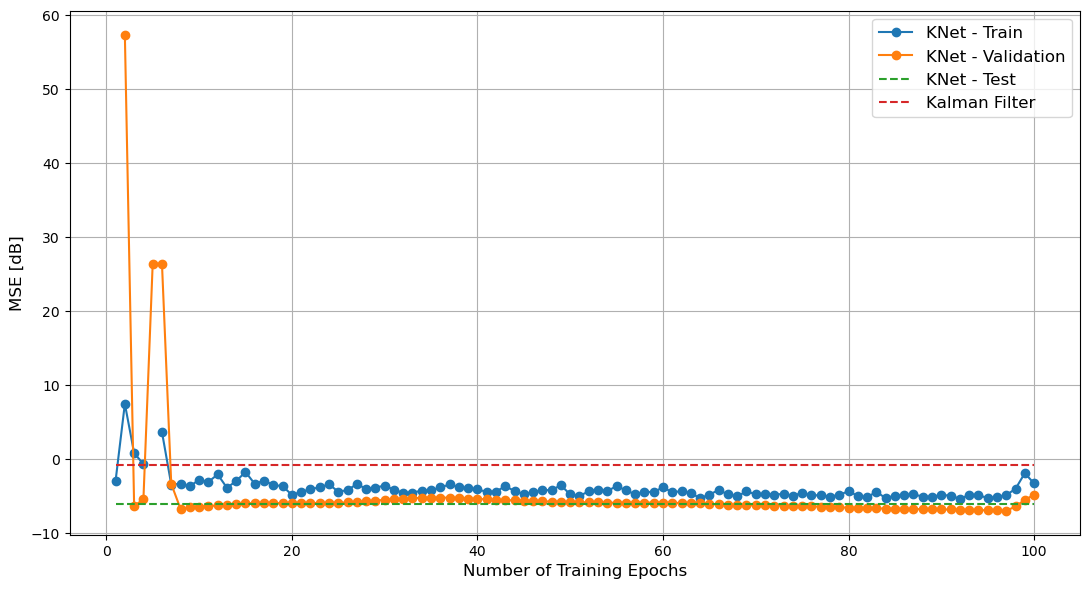

In [60]:
# Plot average loss per epoch
plot_name = knet_config.save_info.name.replace('_'+data_config.save_info.name, "")+\
                    f'_data_q{data_config.process_var:.0e}_r{data_config.measurement_var:.0e}_t{data_config.test_set.trajectory_length}'
plot.set_add_plot_name(plot_name)
plot.set_figsize((11, 6))
plot.set_fontsize(12)
plot.plot_avg_loss_epoch_compare(train_avg_loss, val_avg_loss,test_avg_loss_kf=test_loss_ekf[0], test_avg_loss_knet=test_loss_knet[0],
                                 in_decibel=True, save_plot=False)#, zoom_bounds=[20, 85, -0.5, 6.5], zoom_location=[0.3, 0.42, 0.6, 0.43])

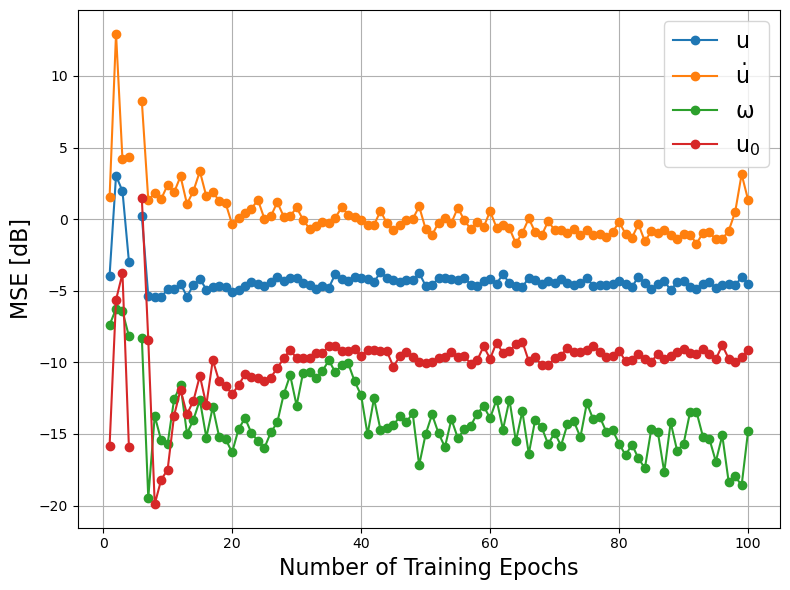

In [61]:
# Plot state validation loss per epoch
plot_name = knet_config.save_info.name.replace('_'+data_config.save_info.name, "")+\
                    f'_data_q{data_config.process_var:.0e}_r{data_config.measurement_var:.0e}_t{data_config.test_set.trajectory_length}'
plot.set_add_plot_name(plot_name)
plot.set_figsize((8, 6))
plot.set_fontsize(16)
plot.plot_state_loss_epoch(train_state_loss, data_set='train', save_plot=False)#, zoom_bounds=[15, 95, -20, 0], zoom_location=[0.2, 0.4, 0.7, 0.5])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


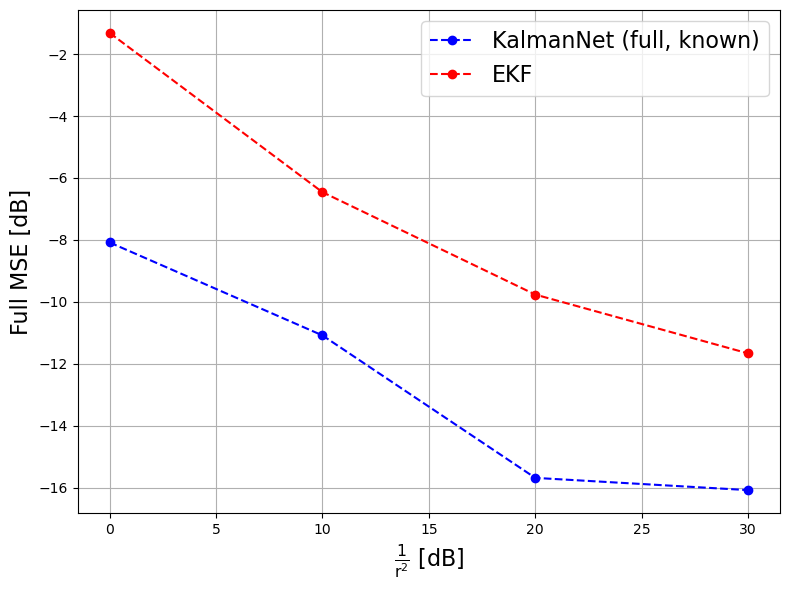

In [4]:
# Default Knet on small trajectories
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_full_default'
loss_name = 'defMSE'
y_label = 'Full MSE [dB]'
estimator_types = ['KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)', 'EKF']

add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_figsize((8, 6))
plot.set_fontsize(16)
plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var,
                                       trajectory_length=data_config.test_set.trajectory_length, loss_name = loss_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


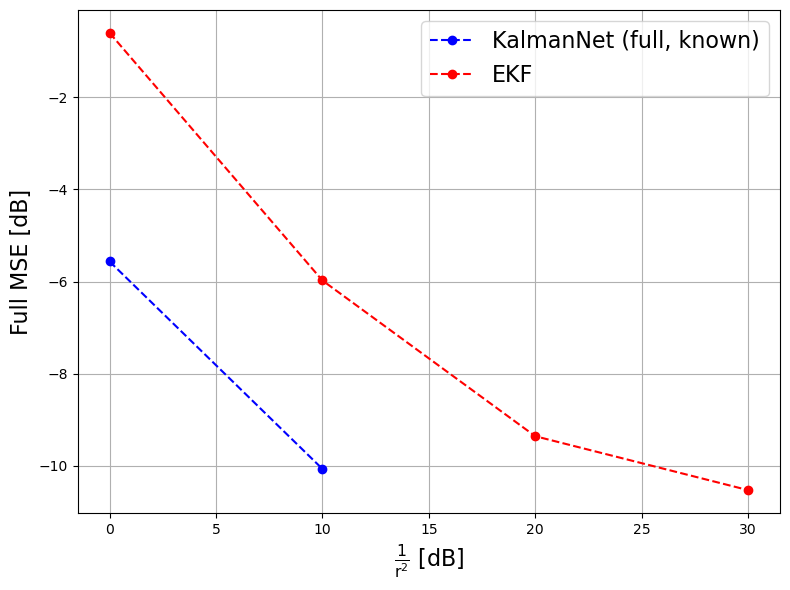

In [5]:
# Default Knet on long trajectories
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_full_default_long'
loss_name = 'defMSE'
y_label = 'Full MSE [dB]'
estimator_types = ['KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)', 'EKF']

add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_figsize((8, 6))
plot.set_fontsize(16)
plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var,
                                       trajectory_length=10000, loss_name = loss_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


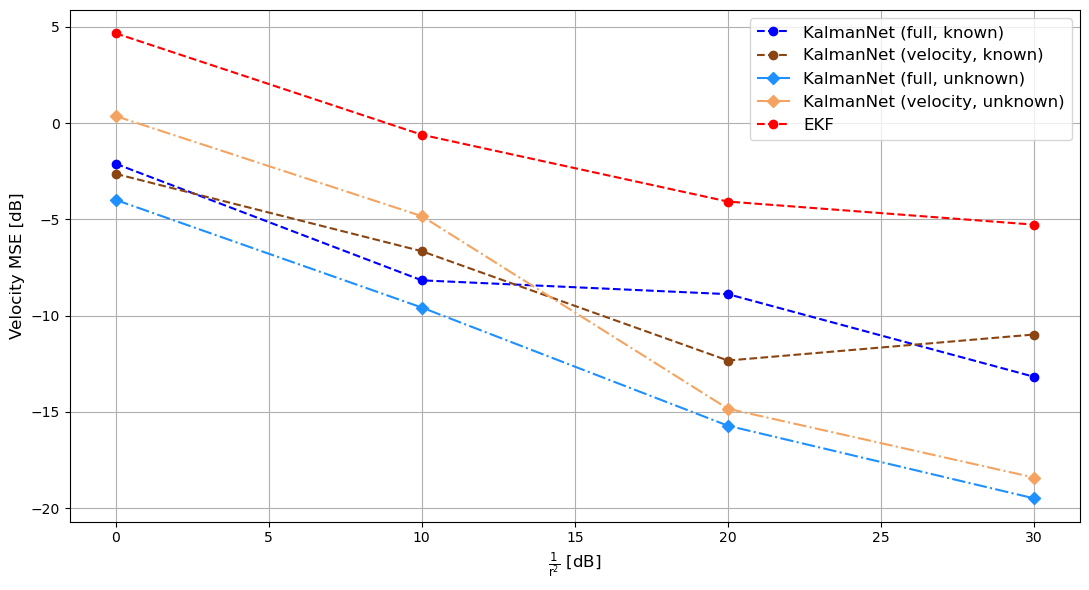

In [71]:
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_vel_all'
loss_name = 'velMSE'
y_label = 'Velocity MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)', 'KalmanNet (velocity, known)', 'KalmanNet (full, unknown)',
                   'KalmanNet (velocity, unknown)', 'EKF']


add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_figsize((11, 6))
plot.set_fontsize(12)
plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var, trajectory_length = data_config.test_set.trajectory_length, loss_name=loss_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


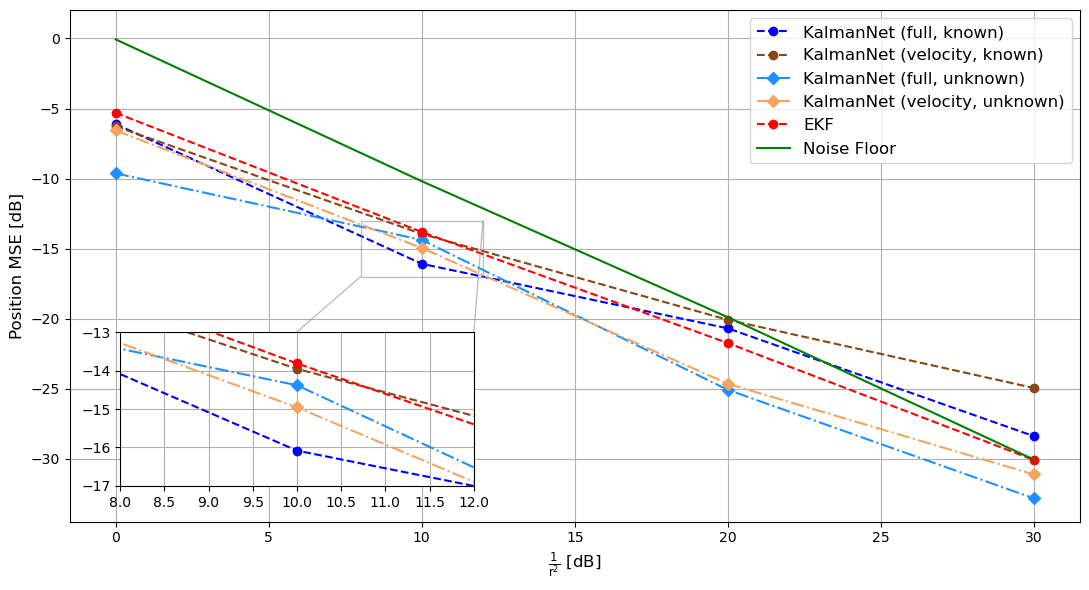

In [68]:
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_pos_all'
loss_name = 'posMSE'
y_label = 'Position MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter',
                   'IdentityEstimator']
estimator_names = ['KalmanNet (full, known)', 'KalmanNet (velocity, known)', 'KalmanNet (full, unknown)',
                   'KalmanNet (velocity, unknown)', 'EKF', 'Noise Floor']

add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, zoom_bounds=[8, 12, -17, -13], zoom_location=[0.05, 0.07, 0.35, 0.3],
                                       n_features=1, trajectory_length = data_config.test_set.trajectory_length,
                                       process_variance=process_var)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


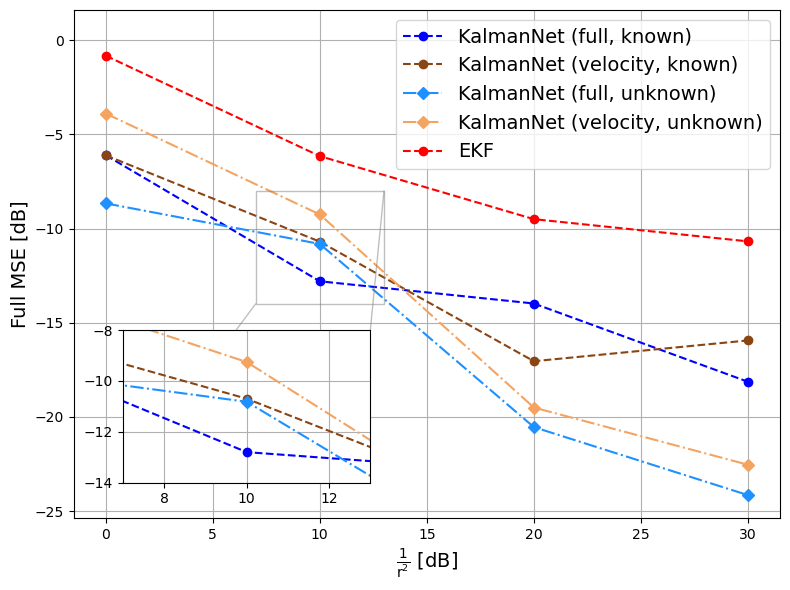

In [63]:
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_full_all'
loss_name = 'defMSE'
y_label = 'Full MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)', 'KalmanNet (velocity, known)', 'KalmanNet (full, unknown)',
                   'KalmanNet (velocity, unknown)', 'EKF']

add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_add_plot_name(plot_name)
plot.set_figsize((8, 6))
plot.set_fontsize(14)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, zoom_bounds=[7, 13, -14, -8], zoom_location=[0.07, 0.07, 0.35, 0.3],
                                       n_features=1, process_variance=process_var,
                                       trajectory_length=data_config.test_set.trajectory_length, loss_name=loss_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


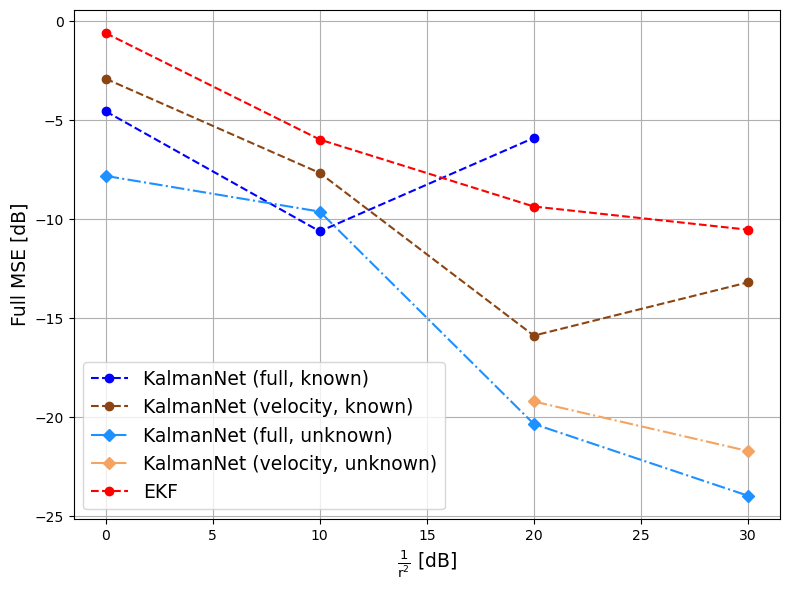

In [66]:
# Full MSE on long trajectories
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_full_all_long'
loss_name = 'defMSE'
y_label = 'Full MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)', 'KalmanNet (velocity, known)', 'KalmanNet (full, unknown)',
                   'KalmanNet (velocity, unknown)', 'EKF']

add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_figsize((8, 6))
plot.set_fontsize(13.5)
plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label,# zoom_bounds=[7, 13, -14, -10], zoom_location=[0.05, 0.07, 0.35, 0.3],
                                       n_features=1, process_variance=process_var,
                                       trajectory_length=10000, loss_name=loss_name)

In [ ]:
# Position MSE on long trajectories
plot_name = f'q{data_config.process_var:.0e}_pos_all_long'
loss_name = 'posMSE'
y_label = 'Position MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter', 'IdentityEstimator']
estimator_names = ['KalmanNet (full, known)', 'KalmanNet (velocity, known)', 'KalmanNet (full, unknown)',
                   'KalmanNet (velocity, unknown)', 'EKF', 'Noise Floor']

add_filters_per_estimator = {
    estimator_names[0]: {'loss_name': loss_name, 'training_config': "'MSE'", 'trained_random_variance': 'None'},
    estimator_names[1]: {'loss_name': loss_name, 'training_config': "'velMSE'", 'trained_random_variance': 'None'},
    estimator_names[2]: {'loss_name': loss_name, 'training_config': "'MSE'", 'trained_random_variance': '[2, 2, 1, 1]'},
    estimator_names[3]: {'loss_name': loss_name, 'training_config': "'velMSE'", 'trained_random_variance': '[2, 2, 1, 1]'},
    estimator_names[4]: {'loss_name': loss_name}}
process_var = 1e-4

plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var,
                                       trajectory_length=10000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


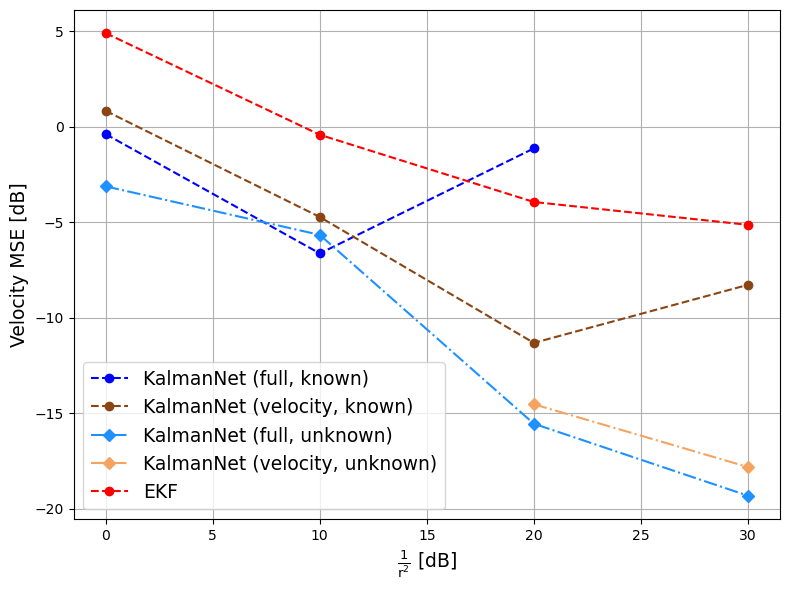

In [70]:
# Velocity MSE on long trajectories
plot_name = f'q{data_config.process_var:.0e}_vel_all_long'
loss_name = 'velMSE'
y_label = 'Velocity MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)', 'KalmanNet (velocity, known)', 'KalmanNet (full, unknown)',
                   'KalmanNet (velocity, unknown)', 'EKF']

add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_add_plot_name(plot_name)
plot.set_figsize((8, 6))
plot.set_fontsize(13.5)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var, loss_name=loss_name,
                                       trajectory_length=10000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


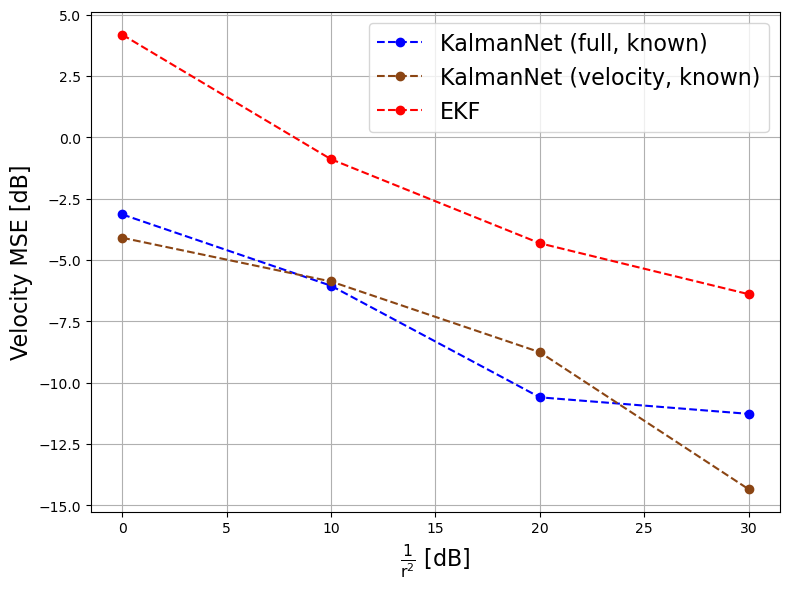

In [24]:
# Knet full on small trajectories
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_full_2'
loss_name = 'defMSE'
y_label = 'Full MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)','KalmanNet (velocity, known)', 'EKF']


add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_figsize((8, 6))
plot.set_fontsize(16)
plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var,
                                       trajectory_length=data_config.test_set.trajectory_length, loss_name=loss_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


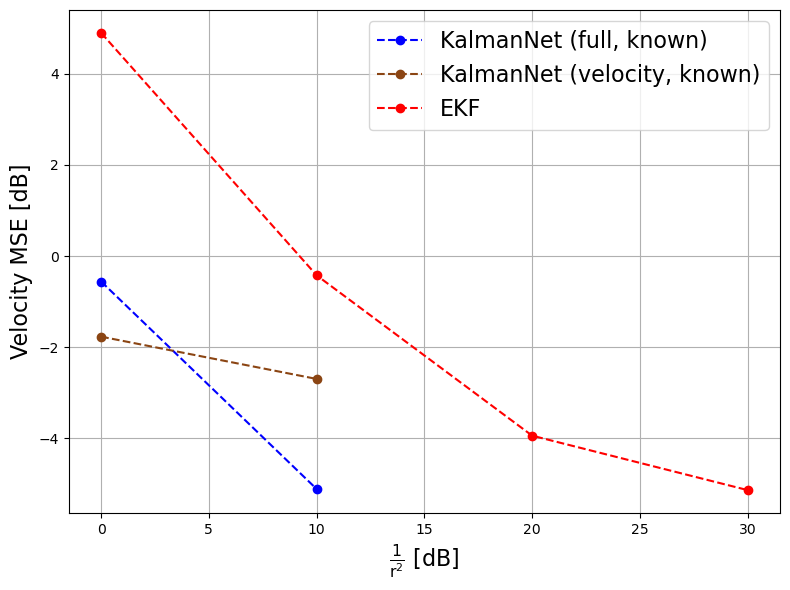

In [23]:
# Knet full on long trajectories
plot_name = f'q{data_config.process_var:.0e}_t{data_config.test_set.trajectory_length}_full_2_long'
loss_name = 'defMSE'
y_label = 'Full MSE [dB]'
estimator_types = ['KalmanNetNN', 'KalmanNetNN', 'ExtendedKalmanFilter']
estimator_names = ['KalmanNet (full, known)','KalmanNet (velocity, known)', 'EKF']


add_filters_per_estimator = get_add_filters_per_estimator(estimator_names, data_config.train_set)
process_var = 1e-4

plot.set_figsize((8, 6))
plot.set_fontsize(16)
plot.set_add_plot_name(plot_name)
plot.plot_results_different_estimators(estimator_types, estimator_label_names=estimator_names,
                                       add_filter_per_estimator=add_filters_per_estimator, save_plot=True,
                                       y_label=y_label, n_features=1, process_variance=process_var,
                                       trajectory_length=10000, loss_name=loss_name)